In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import cross_val_score
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
df.shape

(8124, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [7]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

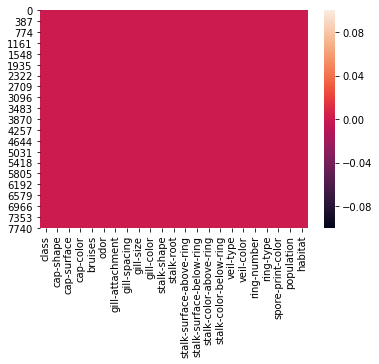

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


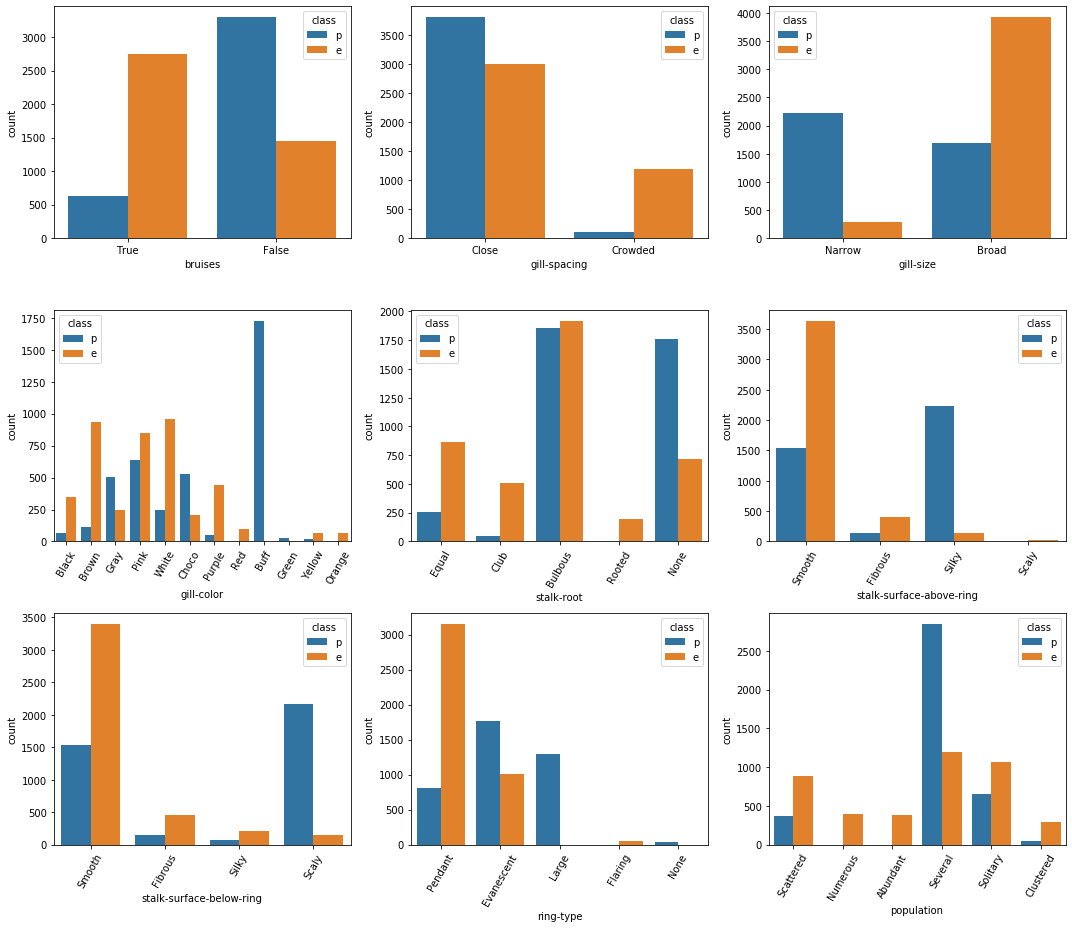

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13)) 

bruises_bar = sns.countplot(x="bruises", hue="class", data=df, ax=axes[0][0]);
bruises_bar.set_xticklabels(["True", "False"])
gill_spacing_bar = sns.countplot(x="gill-spacing", hue="class", data=df, ax=axes[0][1]);
gill_spacing_bar.set_xticklabels(["Close", "Crowded", "Distant"])
gill_size_bar = sns.countplot(x="gill-size", hue="class", data=df, ax=axes[0][2]);
gill_size_bar.set_xticklabels(["Narrow", "Broad"])
gill_color_bar = sns.countplot(x="gill-color", hue="class", data=df, ax=axes[1][0]);
gill_color_bar.set_xticklabels(["Black", "Brown", "Gray", "Pink", "White", "Choco", "Purple", "Red", "Buff", "Green", "Yellow", "Orange"], rotation=60)


stalk_root_bar = sns.countplot(x="stalk-root", hue="class", data=df, ax=axes[1][1]);
stalk_root_bar.set_xticklabels(["Equal", "Club", "Bulbous", "Rooted", "None"], rotation=60)


stalk_sar_bar = sns.countplot(x="stalk-surface-above-ring", hue="class", data=df, ax=axes[1][2]);
stalk_sar_bar.set_xticklabels(["Smooth", "Fibrous", "Silky", "Scaly"], rotation=60)

stalk_sbr_bar = sns.countplot(x="stalk-surface-below-ring", hue="class", data=df, ax=axes[2][0]);
stalk_sbr_bar.set_xticklabels(["Smooth", "Fibrous", "Silky", "Scaly"], rotation=60)


ring_type_bar = sns.countplot(x="ring-type", hue="class", data=df, ax=axes[2][1]);
ring_type_bar.set_xticklabels(["Pendant", "Evanescent", "Large", "Flaring", "None"], rotation=60)


population_bar = sns.countplot(x="population", hue="class", data=df, ax=axes[2][2]);
population_bar.set_xticklabels(["Scattered", "Numerous", "Abundant", "Several", "Solitary", "Clustered"], rotation=60)

fig.tight_layout()
plt.show()

In [12]:
y=df['class']
x=df.drop('class',axis=1)

In [13]:
y.value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [14]:
x.shape,y.shape

((8124, 22), (8124,))

In [15]:
le=LabelEncoder()
y=le.fit_transform(y)

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [18]:
# Creating Artificial Neural Network Model

In [19]:
model=Sequential()
model.add(Dense(units=1024,init='uniform',activation='relu',input_dim=xtrain.shape[1]))
model.add(Dense(units=256,init='uniform',activation='relu'))
model.add(Dense(units=128,init='uniform',activation='relu'))
model.add(Dense(units=1, init='uniform',activation='sigmoid'))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
    

In [20]:
model.fit(xtrain,ytrain,batch_size=10,epochs=200)

Epoch 1/200
6499/6499 [==============================] - 14s 2ms/step - loss: 0.0293 - accuracy: 0.9903
Epoch 2/200
6499/6499 [==============================] - 11s 2ms/step - loss: 0.0024 - accuracy: 0.9991 0s - loss: 0.0024 - accuracy: 
Epoch 3/200
6499/6499 [==============================] - 12s 2ms/step - loss: 2.2827e-06 - accuracy: 1.0000
Epoch 4/200
6499/6499 [==============================] - 13s 2ms/step - loss: 6.5922e-07 - accuracy: 1.0000
Epoch 5/200
6499/6499 [==============================] - 12s 2ms/step - loss: 3.0180e-07 - accuracy: 1.0000
Epoch 6/200
6499/6499 [==============================] - 12s 2ms/step - loss: 1.6439e-07 - accuracy: 1.0000
Epoch 7/200
6499/6499 [==============================] - 11s 2ms/step - loss: 9.8290e-08 - accuracy: 1.0000
Epoch 8/200
6499/6499 [==============================] - 11s 2ms/step - loss: 6.1594e-08 - accuracy: 1.0000
Epoch 9/200
6499/6499 [==============================] - 12s 2ms/step - loss: 3.9526e-08 - accuracy: 1.0000
Epoch

6499/6499 [==============================] - 11s 2ms/step - loss: 2.1071e-11 - accuracy: 1.0000
Epoch 75/200
6499/6499 [==============================] - 11s 2ms/step - loss: 2.1210e-11 - accuracy: 1.0000
Epoch 76/200
6499/6499 [==============================] - 11s 2ms/step - loss: 2.1448e-11 - accuracy: 1.0000
Epoch 77/200
6499/6499 [==============================] - 13s 2ms/step - loss: 2.1596e-11 - accuracy: 1.0000
Epoch 78/200
6499/6499 [==============================] - 13s 2ms/step - loss: 2.1692e-11 - accuracy: 1.0000
Epoch 79/200
6499/6499 [==============================] - 13s 2ms/step - loss: 2.1953e-11 - accuracy: 1.0000
Epoch 80/200
6499/6499 [==============================] - 15s 2ms/step - loss: 2.2112e-11 - accuracy: 1.0000
Epoch 81/200
6499/6499 [==============================] - ETA: 0s - loss: 2.2247e-11 - accuracy: 1.0000 ETA: 0s - loss: 2.2724e-11 - accu - 12s 2ms/step - loss: 2.2217e-11 - accuracy: 1.0000
Epoch 82/200
6499/6499 [==============================] - 2

6499/6499 [==============================] - 11s 2ms/step - loss: 2.1153e-11 - accuracy: 1.0000
Epoch 147/200
6499/6499 [==============================] - 11s 2ms/step - loss: 2.1238e-11 - accuracy: 1.0000
Epoch 148/200
6499/6499 [==============================] - 12s 2ms/step - loss: 2.1304e-11 - accuracy: 1.0000 2s - los
Epoch 149/200
6499/6499 [==============================] - 10s 2ms/step - loss: 2.1407e-11 - accuracy: 1.0000
Epoch 150/200
6499/6499 [==============================] - 12s 2ms/step - loss: 2.1470e-11 - accuracy: 1.0000
Epoch 151/200
6499/6499 [==============================] - 11s 2ms/step - loss: 2.1573e-11 - accuracy: 1.0000
Epoch 152/200
6499/6499 [==============================] - 10s 2ms/step - loss: 2.1658e-11 - accuracy: 1.0000
Epoch 153/200
6499/6499 [==============================] - 10s 2ms/step - loss: 2.1746e-11 - accuracy: 1.0000
Epoch 154/200
6499/6499 [==============================] - 11s 2ms/step - loss: 2.1761e-11 - accuracy: 1.0000
Epoch 155/200
6

In [24]:
model.fit(xtrain,ytrain)

Epoch 1/1
6499/6499 [==============================] - 5s 709us/step - loss: 2.4224e-11 - accuracy: 1.0000


In [29]:
acc = model.evaluate(xtest, ytest, verbose = 2, batch_size = 32)
print('Accuracy: ', acc)

Accuracy:  [8.248188081675568e-10, 1.0]
